In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nehajaiswal06_stresslevel_path = kagglehub.dataset_download('nehajaiswal06/stresslevel')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stresslevel/StressLevelDataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("/kaggle/input/stresslevel/StressLevelDataset.csv")

In [ ]:
print(df.shape)
print(df.head())
print(df.info())

(1100, 21)
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...          

In [ ]:
# Problem 1:How many students are stressed?
print(df["stress_level"].value_counts())


stress_level
0    373
2    369
1    358
Name: count, dtype: int64


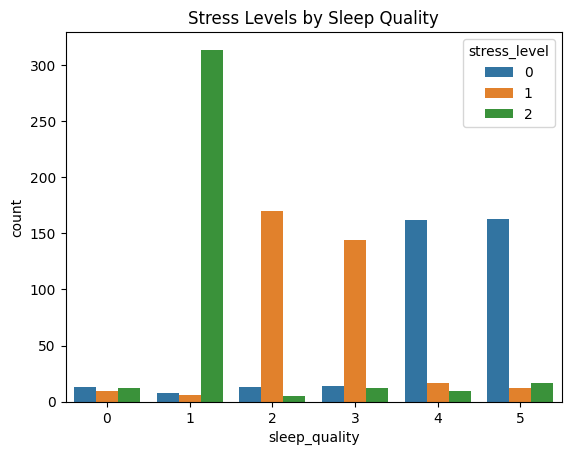

In [ ]:
# Problem 2: Does sleep quality affect stress level>
sns.countplot(x="sleep_quality", hue="stress_level", data=df)
plt.title("Stress Levels by Sleep Quality")
plt.show()

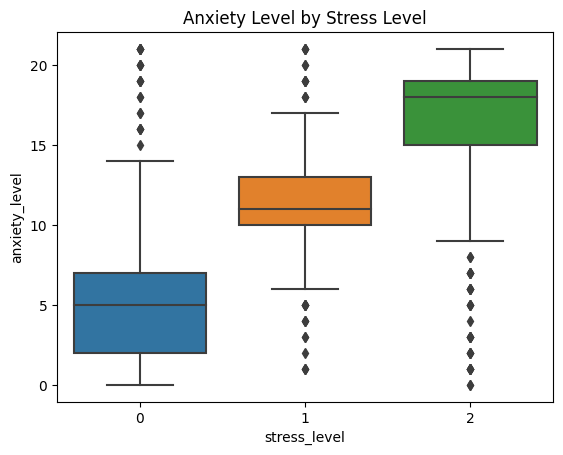

In [ ]:
# Problem 3: Does anxiety affect stress type?
sns.boxplot(x="stress_level", y="anxiety_level", data=df)
plt.title("Anxiety Level by Stress Level")
plt.show()

In [ ]:
#4. Problem 4: Which factors matter the most?
#convert target(stress_level) to numbers
df["stress_level"] = df["stress_level"].astype("category").cat.codes

#Featues and target
X = pd.get_dummies(df.drop("stress_level", axis=1))
y = df["stress_level"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train simple model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.90      0.86      0.88        73
           2       0.90      0.87      0.89        71

    accuracy                           0.87       220
   macro avg       0.88      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



Top 5 Features Influencing Stress:
blood_pressure                0.137351
sleep_quality                 0.110374
safety                        0.096544
depression                    0.071200
extracurricular_activities    0.069518
dtype: float64


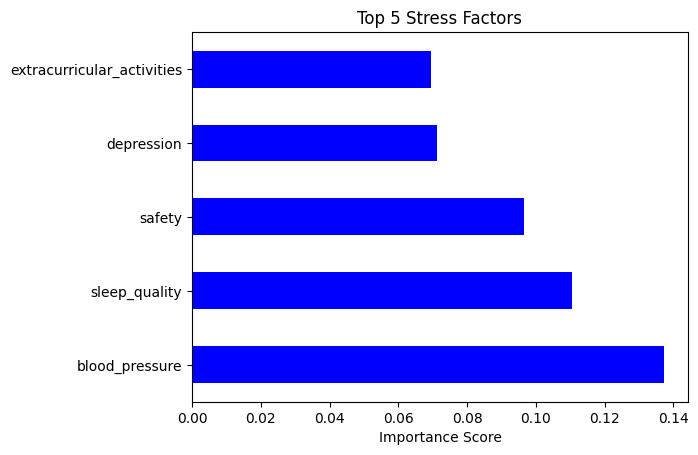

In [ ]:
#5. Problem 5: What are the top 5 reasons for stress?
# Feature importance from the trained model
importance = pd.Series(model.feature_importances_, index=X.columns)

# Top 5 features
top_features = importance.sort_values(ascending=False).head(5)

print("Top 5 Features Influencing Stress:")
print(top_features)

# Plot
top_features.plot(kind="barh", color="blue")  # <-- fixed 'color'
plt.title("Top 5 Stress Factors")             # <-- fixed typo in title
plt.xlabel("Importance Score")                # <-- fixed xlabel typo
plt.show()
